[0, 0, 0, 0]


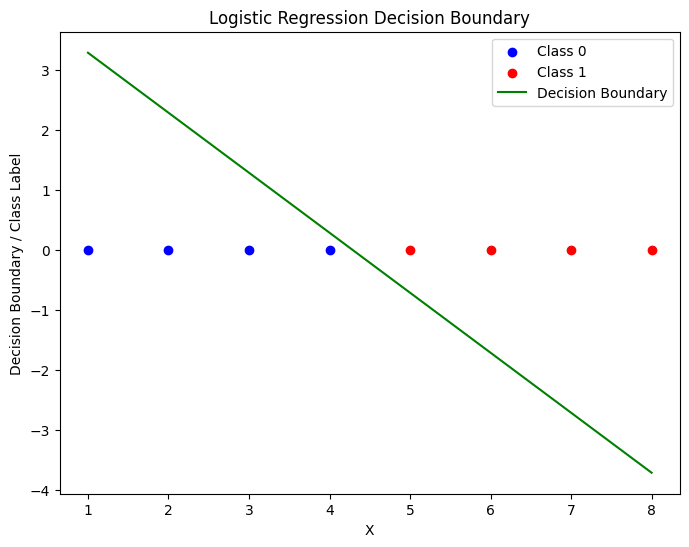

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    def decision_boundary(self, x):
         # Decision boundary equation: w1*x + w0 = 0 (for a 2D case)
         return (-self.weights[0] * x - self.bias) / self.weights[0]

# Example usage:
if __name__ == "__main__":
    # Sample dataset
    X = np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
    y = np.array([0, 0,0,0,1, 1, 1, 1])

    # Train logistic regression model
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X, y)

    # Test data
    X_test = np.array([[1], [1.5], [2], [2.5]])

    # Predict
    predictions = model.predict(X_test)
    print(predictions)

    # Plotting
    plt.figure(figsize=(8, 6))

    # Scatter plot for training data
    plt.scatter(X[y == 0], [0] * np.sum(y == 0), color='blue', label='Class 0')
    plt.scatter(X[y == 1], [0] * np.sum(y == 1), color='red', label='Class 1')

    # Plot decision boundary
    decision_boundary_x = np.linspace(min(X), max(X), 100)
    decision_boundary_y = model.decision_boundary(decision_boundary_x)
    plt.plot(decision_boundary_x, decision_boundary_y, color='green', label='Decision Boundary')

    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('X')
    plt.ylabel('Decision Boundary / Class Label')
    plt.legend()
    plt.show()

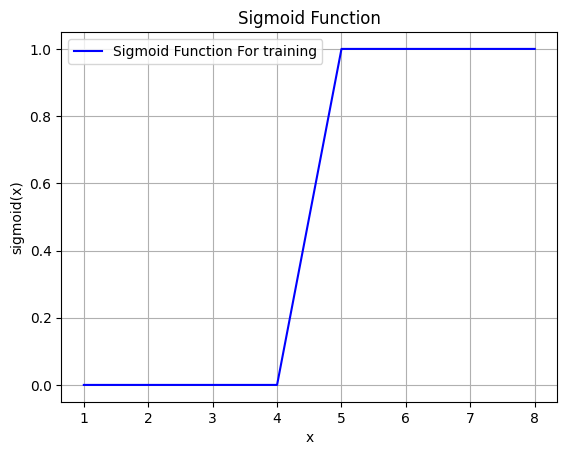

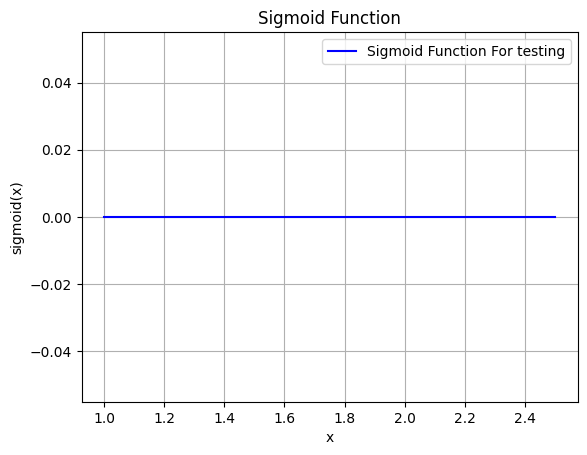

In [2]:
plt.plot(X, y, label='Sigmoid Function For training', color='blue')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(X_test, predictions, label='Sigmoid Function For testing', color='blue')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()